In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
import os

os.chdir("/content/gdrive/My Drive/CIS520 Final Project/pytorch_stacked_hourglass-master")
!nvidia-smi

In [ ]:
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc

In [26]:
!jupyter nbconvert --to PDF "main.ipynb"

[NbConvertApp] Converting notebook main.ipynb to PDF
[NbConvertApp] Support files will be in main_files/
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Writing 669457 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1158237 bytes to m

## Prepare skeleton vectors

In [ ]:
# !tar -xvf "mpii_human_pose_v1.tar" -C "images"     #[run this cell to extract tar files]

In [ ]:
!python test.py -c test_run_001

=> loading checkpoint 'exp/test_run_001'
=> loaded checkpoint 'exp/test_run_001' (epoch 214)
100% 20000/20000 [3:20:55<00:00,  1.66it/s]
100% 2958/2958 [41:00<00:00,  1.20it/s]
all :
Val PCK @, 0.5 , total : 0.902 , count: 44239
Tra PCK @, 0.5 , total : 0.957 , count: 298531
Val PCK @, 0.5 , ankle : 0.808 , count: 4234
Tra PCK @, 0.5 , ankle : 0.892 , count: 27953
Val PCK @, 0.5 , knee : 0.846 , count: 4963
Tra PCK @, 0.5 , knee : 0.938 , count: 33212
Val PCK @, 0.5 , hip : 0.888 , count: 5777
Tra PCK @, 0.5 , hip : 0.972 , count: 39109
Val PCK @, 0.5 , pelvis : 0.926 , count: 2878
Tra PCK @, 0.5 , pelvis : 0.986 , count: 19478
Val PCK @, 0.5 , thorax : 0.985 , count: 2932
Tra PCK @, 0.5 , thorax : 0.995 , count: 19877
Val PCK @, 0.5 , neck : 0.98 , count: 2932
Tra PCK @, 0.5 , neck : 0.992 , count: 19877
Val PCK @, 0.5 , head : 0.965 , count: 2931
Tra PCK @, 0.5 , head : 0.977 , count: 19875
Val PCK @, 0.5 , wrist : 0.85 , count: 5837
Tra PCK @, 0.5 , wrist : 0.917 , count: 39548
Val 

### Please view the examples of skeleton vectors and images at the end of this notebook.

# Part 1: Action classification from skeleton vectors

In [ ]:
import numpy as np
imgs = np.load('img_path.npy')
skeletons = np.load('pred_skeleton.npy', allow_pickle=True)

In [ ]:
import scipy.io
mat = scipy.io.loadmat('mpii_human_pose_v1_u12_1.mat')
name_action_pairs = {}
for i in range(mat['RELEASE']['act'][0][0].shape[0]):
    img_name     = mat['RELEASE']['annolist'][0][0][0][i][0][0][0][0][0] 
    action_label = mat['RELEASE']['act'][0][0][i][0][2][0][0]              
    if action_label == -1:
        continue
    name_action_pairs[img_name] = action_label

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter

mypath = './data/MPII/images/'

x = []
y = []

for i in range(len(imgs)):
  # if len(Counter(y).keys()) == 10:
  #     break
  img = imgs[i]
  try:
    label = name_action_pairs[img[-13:]]
  except:
    continue
  if label == -1:
    continue
  x.append(skeletons[i][0]['keypoints'])
  y.append(label)


In [ ]:
print(skeletons[0][0]['keypoints'])

[[6.20000000e+02 3.93000000e+02 7.65208006e-01]
 [6.20000000e+02 2.69000000e+02 6.10079527e-01]
 [5.79000000e+02 1.81000000e+02 4.63927209e-01]
 [6.44000000e+02 1.93000000e+02 4.10175681e-01]
 [6.61000000e+02 2.22000000e+02 8.42810497e-02]
 [6.73000000e+02 2.81000000e+02 1.07088285e-02]
 [6.14000000e+02 1.87000000e+02 4.53910530e-01]
 [6.50000000e+02 1.63000000e+02 6.57784462e-01]
 [6.32000000e+02 1.81000000e+02 6.00388110e-01]
 [7.09000000e+02 1.16000000e+02 4.36288774e-01]
 [6.14000000e+02 2.10000000e+02 8.05531383e-01]
 [5.55000000e+02 1.57000000e+02 7.04271674e-01]
 [6.08000000e+02 1.45000000e+02 4.53045249e-01]
 [6.97000000e+02 1.75000000e+02 6.57363534e-01]
 [6.91000000e+02 2.40000000e+02 7.30330646e-01]
 [6.85000000e+02 3.05000000e+02 8.06860447e-01]]


In [ ]:
import numpy as np
x = np.array(x)
x = np.reshape(x, (x.shape[0], -1))
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(hidden_layer_sizes=(100,200,50,200,100), random_state=12, max_iter=2000, warm_start=True).fit(x_train, y_train)
clf_mlp.score(x_test, y_test)

In [ ]:
print('Precision Score: ',precision_score(y_test, clf_mlp.predict(x_test), average='weighted', zero_division=0))
print('Recall Score: ',recall_score(y_test, clf_mlp.predict(x_test), average='weighted', zero_division=0))
print('F1 Score: ',f1_score(y_test, clf_mlp.predict(x_test), average='weighted', zero_division=0))

Precision Score:  0.20216895669751153
Recall Score:  0.2113095238095238
F1 Score:  0.19463132253036974


In [ ]:
from sklearn.linear_model import LogisticRegression

clf_logi = LogisticRegression(C=0.8, random_state=12, max_iter=2000, multi_class='multinomial', warm_start=True).fit(x_train, y_train)
clf_logi.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.19345238095238096

In [ ]:
print('Precision Score: ',precision_score(y_test, clf_logi.predict(x_test), average='weighted', zero_division=0))
print('Recall Score: ',recall_score(y_test, clf_logi.predict(x_test), average='weighted', zero_division=0))
print('F1 Score: ',f1_score(y_test, clf_logi.predict(x_test), average='weighted', zero_division=0))

Precision Score:  0.18057140228192858
Recall Score:  0.19345238095238096
F1 Score:  0.17529112707456754


In [ ]:
from sklearn import svm
clf_linsvc = svm.LinearSVC(C=1, random_state=12, max_iter=2000).fit(x_train, y_train)
clf_linsvc.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.5384615384615384

In [ ]:
print('Precision Score: ',precision_score(y_test, clf_linsvc.predict(x_test), average='weighted', zero_division=0))
print('Recall Score: ',recall_score(y_test, clf_linsvc.predict(x_test), average='weighted', zero_division=0))
print('F1 Score: ',f1_score(y_test, clf_linsvc.predict(x_test), average='weighted', zero_division=0))

Precision Score:  0.015274726337190889
Recall Score:  0.05357142857142857
F1 Score:  0.0154654071773637


In [ ]:
clf_rbfsvc = svm.SVC(C=0.8, kernel='rbf', random_state=12, max_iter=2000).fit(x_train, y_train)
clf_rbfsvc.score(x_test, y_test)

0.0318499127399651

In [ ]:
print('Precision Score: ',precision_score(y_test, clf_rbfsvc.predict(x_test), average='weighted', zero_division=0))
print('Recall Score: ',recall_score(y_test, clf_rbfsvc.predict(x_test), average='weighted', zero_division=0))
print('F1 Score: ',f1_score(y_test, clf_rbfsvc.predict(x_test), average='weighted', zero_division=0))

Precision Score:  0.041171863705249404
Recall Score:  0.14285714285714285
F1 Score:  0.06285102760805261


In [ ]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=12).fit(x_train, y_train)
clf_dt.score(x_test, y_test)

0.062390924956369984

In [ ]:
print('Precision Score: ',precision_score(y_test, clf_dt.predict(x_test), average='weighted', zero_division=0))
print('Recall Score: ',recall_score(y_test, clf_dt.predict(x_test), average='weighted', zero_division=0))
print('F1 Score: ',f1_score(y_test, clf_dt.predict(x_test), average='weighted', zero_division=0))

Precision Score:  0.18243970227951323
Recall Score:  0.1488095238095238
F1 Score:  0.15476581469366327


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=12, warm_start=True).fit(x_train, y_train)
clf_rf.score(x_test, y_test)

0.17342931937172776

In [ ]:
print('Precision Score: ',precision_score(y_test, clf_rf.predict(x_test), average='weighted', zero_division=0))
print('Recall Score: ',recall_score(y_test, clf_rf.predict(x_test), average='weighted', zero_division=0))
print('F1 Score: ',f1_score(y_test, clf_rf.predict(x_test), average='weighted', zero_division=0))

Precision Score:  0.26363494189946507
Recall Score:  0.28273809523809523
F1 Score:  0.24599325207108655


# Part 2: Deep action classification with skeletion vectors concatenated

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import skimage
import copy
import os

import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [4]:
# HELPER DICTIONARY
mat = scipy.io.loadmat('mpii_human_pose_v1_u12_1.mat')
name_action_pairs = {}
labels = []
for i in range(mat['RELEASE']['act'][0][0].shape[0]):
    img_name     = mat['RELEASE']['annolist'][0][0][0][i][0][0][0][0][0]   # the dataset format is as dumb as fuck, but this is the way to extract image names 
    action_label = mat['RELEASE']['act'][0][0][i][0][2][0][0]              # the dataset format is as dumb as fuck, but this is the way to extract action labels 
    name_action_pairs[img_name] = np.array([action_label])
    labels.append(action_label)
num_labels = len(set(labels))  # num of unique labels

In [ ]:
# PREPARE DATASETS
# img_names = np.load('img_path.npy')
# for idx in range(len(img_names)):
#     img_name = img_names[idx][-13:]
#     img_path = os.path.join('./data/MPII/images/', img_name)
#     img = io.imread(img_path)

#     action_label = name_action_pairs[img_name]
#     save_path = os.path.join('./images/', str(action_label[0]))

#     if not os.path.exists(save_path):
#         os.makedirs(save_path)
#     save_path = os.path.join('./images/', str(action_label[0]), img_name)
#     io.imsave(save_path, img)

In [ ]:
# DATASETS
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((256, 256)),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

action_dataset = torchvision.datasets.ImageFolder(root='./images/', transform=transform)

batch_size = 64
train_size = int(0.8 * len(action_dataset))
test_size = len(action_dataset) - train_size

train_idx = list(range(0, train_size))
np.random.shuffle(train_idx)
test_idx = list(range(train_size, train_size+test_size))

#trainset, testset = torch.utils.data.random_split(action_dataset, [train_size, test_size])
trainset = torch.utils.data.Subset(action_dataset, train_idx)
testset = torch.utils.data.Subset(action_dataset, test_idx)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=4, drop_last=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4, drop_last=True)

In [ ]:
img_names = np.load('img_path.npy')
img_original_sizes = torch.load('img_original_sizes.pt') 
skeletons = np.load('pred_skeleton.npy', allow_pickle=True)
for j in range(len(skeletons)):
   value = skeletons[j][0]['keypoints'][:, :-1]
   skeletons[j][0]['keypoints'][:, :-1] = (value - np.min(value)) / (np.max(value) - np.min(value))

name_skeleton_pairs = {}
name_origin_size_pairs = {}
for idx in range(len(img_names)):
     img_name = img_names[idx][-13:]
     name_skeleton_pairs[img_name] = skeletons[idx][0]['keypoints']
     name_origin_size_pairs[img_name] = img_original_sizes[idx]

skeletons_ordered = []
origin_size_ordered = []
for idx in train_idx:
    img_name = action_dataset.imgs[idx][0][-13:]
    skeletons_ordered.append(name_skeleton_pairs[img_name])
    origin_size_ordered.append(name_origin_size_pairs[img_name])
for idx in test_idx:
    img_name = action_dataset.imgs[idx][0][-13:]
    skeletons_ordered.append(name_skeleton_pairs[img_name])
    origin_size_ordered.append(name_origin_size_pairs[img_name])

# skeleton = name_skeleton_pairs[img_name]
# original_size = name_origin_size_pairs[img_name]
# xscale = original_size[1] / 256
# yscale = original_size[0] / 256
# skeleton[:, 0] /= xscale  
# skeleton[:, 1] /= yscale
# skeletons_ordered.append(skeleton)

In [6]:
# MODELS
class VGG16_Skeleton(nn.Module):    # VGG-16 for Cifar-10 dataset
    def __init__(self, raw_model):
        super(VGG16_Skeleton, self).__init__()
        self.features = raw_model.features
        self.avgpool = raw_model.avgpool
        self.classifier = raw_model.classifier

    def forward(self, x, skeleton_vec):
        x1 = self.avgpool(self.features(x))
        x1 = x1.view(x1.shape[0], -1)
        x2 = skeleton_vec.view(skeleton_vec.shape[0], -1).float()

        x = torch.cat((x1, x2), dim=1)
        x = self.classifier(x)
        return x

skeleton_vec = torch.ones(16, 2)

vgg16 = models.vgg16(pretrained=False) 
#torch.save(vgg16.state_dict(), 'vgg16.pth')

vgg16_original = models.vgg16(pretrained=False)
# modify the network for fine tuning
vgg16_original.classifier[6] = nn.Linear(vgg16_original.classifier[6].in_features, num_labels)

vgg16_modified = VGG16_Skeleton(vgg16)
#vgg16_modified.load_state_dict(torch.load('vgg16.pth'), strict=False)
# modify the network for fine tuning
vgg16_modified.classifier[0] = nn.Linear(vgg16_modified.classifier[0].in_features+skeleton_vec.shape[0]*skeleton_vec.shape[1], vgg16_modified.classifier[0].out_features)
vgg16_modified.classifier[6] = nn.Linear(vgg16_modified.classifier[6].in_features, num_labels)

In [7]:
vgg16_modified

VGG16_Skeleton(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0,

In [ ]:
# TRAINING W/O SKELETON VECTORS
mode = 'original'  # 'concatenated' or 'original' 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = vgg16_modified.to(device) if mode == 'concatenated' else vgg16_original.to(device)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

sum_accuracy = 0
num_epoch = 50
for epoch in range(num_epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        image, label = data
        image, label = image.to(device), label.to(device)
        target_action = torch.zeros(batch_size, num_labels).to(device)
        for j in range(batch_size):
           target_action[j, label[j]] = 1 

        optimizer.zero_grad()

        if mode == 'concatenated':
            skeleton_vec = torch.from_numpy(np.array([skeletons_ordered[j] for j in range(i*batch_size, (i+1)*batch_size)]))
            skeleton_vec = skeleton_vec[:, :, :-1].to(device)

        pred_action = model(image, skeleton_vec) if mode == 'concatenated' else model(image)
        loss = criterion(pred_action, target_action)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        accuracy = torch.sum(torch.argmax(pred_action, dim=1) == label).item()
        sum_accuracy += accuracy
        if (i + 1) % 20 == 0:
            print('[epoch %d, %5d] loss: %.5f, acc: %.5f' % (epoch, i + 1, running_loss / 20, accuracy / batch_size))
            running_loss = 0.0

    print('End-of-Epoch training accuracy: %.3f ' % (sum_accuracy / (train_size)))
    scheduler.step()
    sum_accuracy = 0.0
torch.save(model.state_dict(), 'vgg16_'+mode+'.pth')
print('Finished Training')

[epoch 0,    20] loss: 6.40255, acc: 0.04688
[epoch 0,    40] loss: 6.27721, acc: 0.00000
[epoch 0,    60] loss: 6.26834, acc: 0.00000
[epoch 0,    80] loss: 6.20826, acc: 0.00000
[epoch 0,   100] loss: 6.20443, acc: 0.01562
[epoch 0,   120] loss: 6.20222, acc: 0.00000
[epoch 0,   140] loss: 6.17915, acc: 0.01562
[epoch 0,   160] loss: 6.15892, acc: 0.01562
[epoch 0,   180] loss: 6.18819, acc: 0.00000
[epoch 0,   200] loss: 6.17095, acc: 0.00000
End-of-Epoch training accuracy: 0.006 
[epoch 1,    20] loss: 6.14755, acc: 0.00000
[epoch 1,    40] loss: 6.11294, acc: 0.00000
[epoch 1,    60] loss: 6.14826, acc: 0.01562
[epoch 1,    80] loss: 6.15589, acc: 0.01562
[epoch 1,   100] loss: 6.16298, acc: 0.00000
[epoch 1,   120] loss: 6.13199, acc: 0.00000
[epoch 1,   140] loss: 6.16222, acc: 0.00000
[epoch 1,   160] loss: 6.15893, acc: 0.00000
[epoch 1,   180] loss: 6.12781, acc: 0.00000
[epoch 1,   200] loss: 6.11270, acc: 0.01562
End-of-Epoch training accuracy: 0.008 
[epoch 2,    20] loss:

In [ ]:
# TESTING
mode = 'original'  # 'concatenated' or 'original' 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = vgg16_modified.to(device) if mode == 'concatenated' else vgg16_original.to(device)
model.load_state_dict(torch.load('vgg16_'+mode+'.pth'))
model.eval()

sum_accuracy = 0

with torch.no_grad():
  for i, data in enumerate(testloader, 0):
      image, label = data
      image, label = image.to(device), label.to(device)
      target_action = torch.zeros(batch_size, num_labels).to(device)
      for j in range(batch_size):
          target_action[j, label[j]] = 1 

      if mode == 'concatenated':
          skeleton_vec = torch.from_numpy(np.array([skeletons_ordered[j] for j in range(train_size + i*batch_size, train_size + (i+1)*batch_size)]))
          skeleton_vec = skeleton_vec[:, :, :-1].to(device)

      pred_action = model(image, skeleton_vec) if mode == 'concatenated' else model(image)
      accuracy = torch.sum(torch.argmax(pred_action, dim=1) == label).item()
      sum_accuracy += accuracy

      if (i + 1) % 10 == 0:
          print('num of data tested', i + 1, '/', 50)

print('Testing accuracy: %.3f ' % (sum_accuracy / (test_size)))

num of data tested 10 / 50
num of data tested 20 / 50
num of data tested 30 / 50
num of data tested 40 / 50
num of data tested 50 / 50
Testing accuracy: 0.884 


In [ ]:
# TRAINING W/ SKELETON VECTORS
mode = 'concatenated'  # 'concatenated' or 'original' 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = vgg16_modified.to(device) if mode == 'concatenated' else vgg16_original.to(device)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

sum_accuracy = 0
num_epoch = 50
for epoch in range(num_epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        image, label = data
        image, label = image.to(device), label.to(device)
        target_action = torch.zeros(batch_size, num_labels).to(device)
        for j in range(batch_size):
           target_action[j, label[j]] = 1 

        optimizer.zero_grad()

        if mode == 'concatenated':
            skeleton_vec = torch.from_numpy(np.array([skeletons_ordered[j] for j in range(i*batch_size, (i+1)*batch_size)]))
            skeleton_vec = skeleton_vec[:, :, :-1].to(device)

        pred_action = model(image, skeleton_vec) if mode == 'concatenated' else model(image)
        loss = criterion(pred_action, target_action)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        accuracy = torch.sum(torch.argmax(pred_action, dim=1) == label).item()
        accuracies.append(accuracy / len(target_action))
        sum_accuracy += accuracy
        if (i + 1) % 20 == 0:
            print('[epoch %d, %5d] loss: %.5f, acc: %.5f' % (epoch, i + 1, running_loss / 20, accuracy / len(target_action)))
            running_loss = 0.0

    print('End-of-Epoch training accuracy: %.3f ' % (sum_accuracy / (train_size)))
    scheduler.step()
    sum_accuracy = 0.0
torch.save(model.state_dict(), 'vgg16_'+mode+'.pth')
print('Finished Training')

[epoch 0,    20] loss: 6.23894, acc: 0.00000
[epoch 0,    40] loss: 6.13947, acc: 0.00000
[epoch 0,    60] loss: 6.11423, acc: 0.03125
[epoch 0,    80] loss: 6.03727, acc: 0.03125
[epoch 0,   100] loss: 6.06110, acc: 0.00000
[epoch 0,   120] loss: 5.99578, acc: 0.01562
[epoch 0,   140] loss: 6.02359, acc: 0.00000
[epoch 0,   160] loss: 5.99560, acc: 0.00000
[epoch 0,   180] loss: 5.98613, acc: 0.03125
[epoch 0,   200] loss: 6.01721, acc: 0.00000
End-of-Epoch training accuracy: 0.007 
[epoch 1,    20] loss: 5.96228, acc: 0.00000
[epoch 1,    40] loss: 5.96232, acc: 0.00000
[epoch 1,    60] loss: 5.98707, acc: 0.01562
[epoch 1,    80] loss: 5.95926, acc: 0.03125
[epoch 1,   100] loss: 5.99695, acc: 0.00000
[epoch 1,   120] loss: 5.92914, acc: 0.03125
[epoch 1,   140] loss: 5.96511, acc: 0.00000
[epoch 1,   160] loss: 5.93946, acc: 0.00000
[epoch 1,   180] loss: 5.94212, acc: 0.00000
[epoch 1,   200] loss: 5.98339, acc: 0.01562
End-of-Epoch training accuracy: 0.007 
[epoch 2,    20] loss:

In [ ]:
# TESTING
mode = 'concatenated'  # 'concatenated' or 'original' 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = vgg16_modified.to(device) if mode == 'concatenated' else vgg16_original.to(device)
model.load_state_dict(torch.load('vgg16_'+mode+'.pth'))
model.eval()

sum_accuracy = 0
num_epoch = 50

with torch.no_grad():
  for i, data in enumerate(testloader, 0):
      image, label = data
      image, label = image.to(device), label.to(device)
      target_action = torch.zeros(batch_size, num_labels).to(device)
      for j in range(batch_size):
          target_action[j, label[j]] = 1 

      if mode == 'concatenated':
          skeleton_vec = torch.from_numpy(np.array([skeletons_ordered[j] for j in range(train_size + i*batch_size, train_size + (i+1)*batch_size)]))
          skeleton_vec = skeleton_vec[:, :, :-1].to(device)

      pred_action = model(image, skeleton_vec) if mode == 'concatenated' else model(image)
      accuracy = torch.sum(torch.argmax(pred_action, dim=1) == label).item()
      sum_accuracy += accuracy

      if (i + 1) % 10 == 0:
          print('num of data tested', i + 1, '/', 50)

print('Testing accuracy: %.3f ' % (sum_accuracy / (test_size)))

num of data tested 10 / 50
num of data tested 20 / 50
num of data tested 30 / 50
num of data tested 40 / 50
num of data tested 50 / 50
Testing accuracy: 0.891 


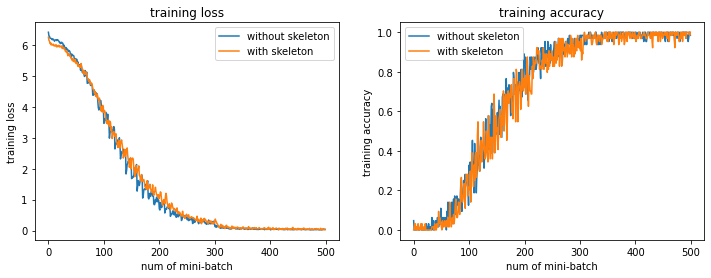

In [ ]:
with open('result_wo.txt') as f:
    lines_wo = f.readlines()
loss_wo = []
acc_wo = []
for row in range(len(lines_wo)):
    loss_wo.append(float(lines_wo[row][23:30]))
    acc_wo.append(float(lines_wo[row][37:44]))

with open('result_w.txt') as f:
    lines_w = f.readlines()
loss_w = []
acc_w = []
for row in range(len(lines_w)):
    loss_w.append(float(lines_w[row][23:30]))
    acc_w.append(float(lines_w[row][37:44]))

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(loss_wo, label='without skeleton')
plt.plot(loss_w, label='with skeleton')
plt.xlabel('num of mini-batch')
plt.ylabel('training loss')
plt.title('training loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_wo, label='without skeleton')
plt.plot(acc_w, label='with skeleton')
plt.xlabel('num of mini-batch')
plt.ylabel('training accuracy')
plt.title('training accuracy')
plt.legend();

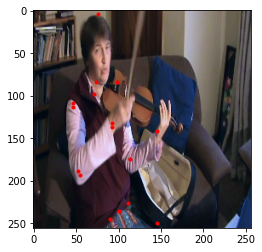

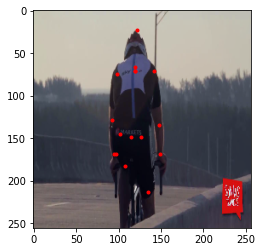

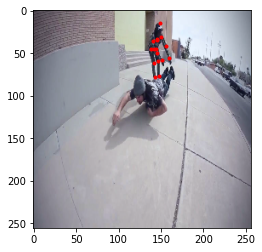

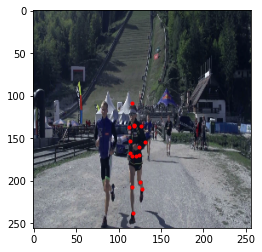

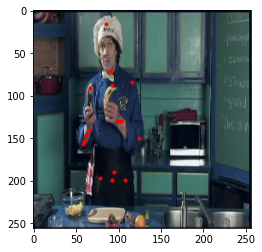

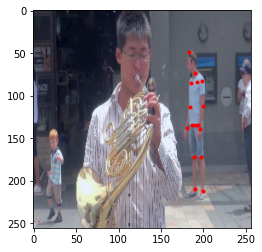

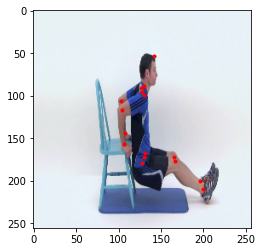

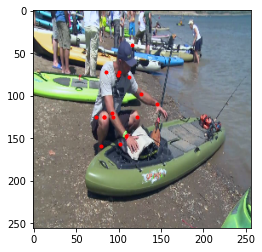

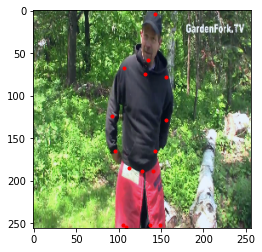

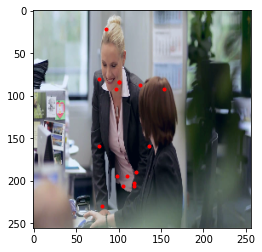

In [ ]:
# visualize skeleton vectors on images
for i, data in enumerate(trainloader, 0):
    image, label = data
    skeleton_vec = torch.from_numpy(np.array([skeletons_ordered[j][:, :-1] for j in range(i*batch_size, (i+1)*batch_size)]))
    origin_size = torch.from_numpy(np.array([origin_size_ordered[j][:2] for j in range(i*batch_size, (i+1)*batch_size)]))
    break

for img_id in range(10):

    curr_img = image[img_id].permute(1, 2, 0)
    curr_img = (curr_img - torch.min(curr_img)) / (torch.max(curr_img) - torch.min(curr_img))
    plt.imshow(curr_img, cmap='gray')

    xscale = origin_size[img_id, 1] / 256
    yscale = origin_size[img_id, 0] / 256
    skeleton_vec[img_id, :, 0] /= xscale  
    skeleton_vec[img_id, :, 1] /= yscale

    plt.plot(skeleton_vec[img_id, :, 0], skeleton_vec[img_id, :, 1], 'r.')
    plt.show()